**1. GA vs RLM**


--- Regresión Lineal ---
Coeficientes: [ 3012.96110744 12229.23540223 -4942.56909887 -1255.07766091]
Error Cuadrático Medio (MSE): 2942168438.84

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 3014.5447834  12304.66803161 -4912.27683466 -1242.45597813]
Error Cuadrático Medio (MSE): 2939791342.19


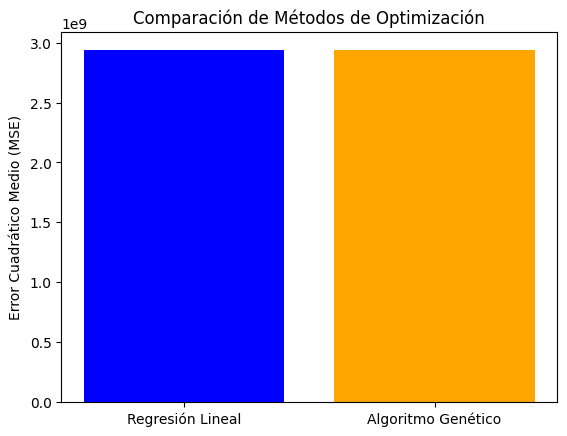

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad

# Precio de la casa (fórmula ficticia con ruido)
true_weights = np.array([3000, 10000, -5000, -1000])  # Pesos reales de cada feature
price = (true_weights[0] * size + true_weights[1] * rooms +
         true_weights[2] * distance + true_weights[3] * age +
         np.random.normal(0, 50000, num_samples))  # Se agrega ruido aleatorio

# Convertir en matriz de características X e y
X = np.column_stack((size, rooms, distance, age))
y = price

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # ? por qué 42

# --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"Coeficientes: {model.coef_}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")

# --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---
from scipy.optimize import differential_evolution

# Definir la función de costo (MSE entre predicciones y valores reales)
def cost_function(weights):
    y_pred = np.dot(X_train, weights) # ? por qué producto punto
    return mean_squared_error(y_train, y_pred)

# Definir los límites de los coeficientes
bounds = [(-50000, 50000)] * 4  # Rango de búsqueda para cada coeficiente

# Aplicar Algoritmo Genético
result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)

# Evaluar el modelo genético
best_weights = result.x
y_pred_ga = np.dot(X_test, best_weights)
mse_ga = mean_squared_error(y_test, y_pred_ga)

print("\n--- Algoritmo Genético ---")
print(f"Mejores coeficientes encontrados: {best_weights}")
print(f"Error Cuadrático Medio (MSE): {mse_ga:.2f}")

# --- COMPARACIÓN VISUAL ---
labels = ['Regresión Lineal', 'Algoritmo Genético']
mse_values = [mse_lr, mse_ga]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Métodos de Optimización")
plt.show()


2. Modificar los datos: Que pasa si se cambian los pesos reales de las features

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad

# Precio de la casa (fórmula ficticia con ruido)
true_weights_list = [np.array([3000, 10000, -5000, -1000]),
                     np.array([-4000, 24000, 87000, -3000]),
                     np.array([27000, 77000, -55000, -11000])]  # CAMBIAR AQUI LOS PESOS REALES

coeficientes_list = []
mse_list = []

# Definir la función de costo (MSE entre predicciones y valores reales)
def cost_function(weights):
    y_pred = np.dot(X_train, weights)
    return mean_squared_error(y_train, y_pred)

n=0
for true_weights in true_weights_list:
  n +=1 
  price = (true_weights[0] * size + true_weights[1] * rooms +
         true_weights[2] * distance + true_weights[3] * age +
         np.random.normal(0, 50000, num_samples))  # Se agrega ruido aleatorio

  # Convertir en matriz de características X e y
  X = np.column_stack((size, rooms, distance, age))
  y = price

  # Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred_lr = model.predict(X_test)
  mse_lr = mean_squared_error(y_test, y_pred_lr)

  print(f"\n\nIteración {n}")
  print("--- Regresión Lineal ---")
  print(f"Coeficientes: {model.coef_}")
  print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")

  # --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---
  from scipy.optimize import differential_evolution

  # Definir los límites de los coeficientes
  bounds = [(-100000, 100000)] * 4  # Rango de búsqueda para cada coeficiente

  # Aplicar Algoritmo Genético
  result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                  mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)

  # Evaluar el modelo genético
  best_weights = result.x
  y_pred_ga = np.dot(X_test, best_weights)
  mse_ga = mean_squared_error(y_test, y_pred_ga)

  print("--- Algoritmo Genético ---")
  print(f"Mejores coeficientes encontrados: {best_weights}")
  print(f"Error Cuadrático Medio (MSE): {mse_ga:.2f}")

  coeficientes_list.append((model.coef_, best_weights))
  mse_list.append((mse_lr, mse_ga))

# --- COMPARACIÓN VISUAL ---
  #labels = ['Regresión Lineal', 'Algoritmo Genético']
  #mse_values = [mse_lr, mse_ga]

  #plt.bar(labels, mse_values, color=['blue', 'orange'])
  #plt.ylabel("Error Cuadrático Medio (MSE)")
  #plt.title("Comparación de Métodos de Optimización")
  #plt.show()





Iteración 1
--- Regresión Lineal ---
Coeficientes: [ 3012.96110744 12229.23540223 -4942.56909887 -1255.07766091]
Error Cuadrático Medio (MSE): 2942168438.84
--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 3014.58354828 12297.57614814 -4911.34483473 -1242.36073856]
Error Cuadrático Medio (MSE): 2939318759.28


Iteración 2
--- Regresión Lineal ---
Coeficientes: [-4033.97832354 20730.6880798  87560.84504957 -2951.3402873 ]
Error Cuadrático Medio (MSE): 2773603513.97
--- Algoritmo Genético ---
Mejores coeficientes encontrados: [-4017.70674626 21532.56756898 87879.17516279 -2820.45672056]
Error Cuadrático Medio (MSE): 2764111820.24


Iteración 3
--- Regresión Lineal ---
Coeficientes: [ 26884.90437956  76373.68978197 -54178.01244116 -11221.40855308]
Error Cuadrático Medio (MSE): 5055984968.79
--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 26891.24583979  77848.04219793 -53600.66997964 -10974.05719186]
Error Cuadrático Medio (MSE): 5002028975.90


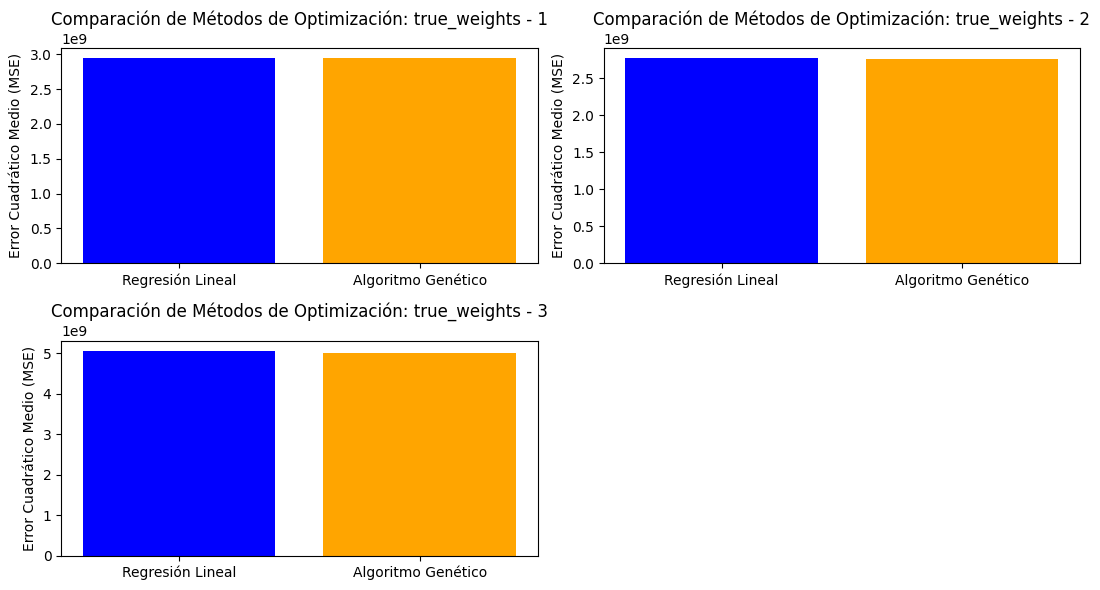

In [160]:
plt.figure(figsize=(11, 6))
for index, mse in enumerate(mse_list):
  plt.subplot(2, 2, index+1)
  labels = ['Regresión Lineal', 'Algoritmo Genético']
  mse_values = [mse[0], mse[1]]
  plt.bar(labels, mse_values, color=['blue', 'orange'])
  plt.ylabel("Error Cuadrático Medio (MSE)")
  plt.title(f"Comparación de Métodos de Optimización: true_weights - {index+1}")

plt.tight_layout()
plt.show()

COLOCAR LA CONCLUSION AQUI:

*   Debido a que el problema es lineal, podemos observar que tanto la regresión lineal como el algoritmo genético convergen de igual manera para los distintos pesos testeados.
*   Los algoritmos genéticos pueden adaptarse a resolver problemas de varios tipos y de acuerdo a las gráficas también pueden llegan a resolver con la misma eficiencia problemas que puede resolver una regresión lineal.
* Dependiendo del valor de los pesos, se tiene que incrementar el valor de los bounds del algoritmo genético porque esto aumenta el espacio de búsqueda para los features.


3. Probar con una Funcion costo no lineal (cualquier feature elevar a una potencia)

Caso 1: Elevando Size**2 para romper la linealidad

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50000, num_samples)  # Años de antigüedad

# Precio de la casa (fórmula ficticia con ruido)
true_weights = np.array([3000, 10000, -5000, -1000])  # Pesos reales de cada feature
price = (true_weights[0] * size**2 + true_weights[1] * rooms +
         true_weights[2] * distance + true_weights[3] * age +
         np.random.normal(0, 50000, num_samples))  # Se agrega ruido aleatorio

# Convertir en matriz de características X e y
X = np.column_stack((size, rooms, distance, age))
y = price

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
#size

In [113]:
#X_train

In [162]:
X_train_non_linear = X_train.copy()
X_test_non_linear = X_test.copy()
#print(X_train_pow_2)

In [163]:
# Elevando al cuadrado al primer feature del dataset: size
X_train_non_linear[:,0] = X_train_non_linear[:, 0]**2

X_test_non_linear[:,0] = X_test_non_linear[:, 0]**2
#print(X_train_pow_2)

In [164]:
# --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
model = LinearRegression()
#model.fit(X_train, y_train)
model.fit(X_train_non_linear, y_train)
y_pred_lr = model.predict(X_test_non_linear)
mse_lr_non_linear_case1 = mean_squared_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"Coeficientes: {model.coef_}")
print(f"Error Cuadrático Medio (MSE): {mse_lr_non_linear_case1:.2f}")


--- Regresión Lineal ---
Coeficientes: [ 2999.76775366  9260.09621968 -4613.26878558 -1000.28533237]
Error Cuadrático Medio (MSE): 3507122262.44


In [165]:
# --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---
from scipy.optimize import differential_evolution

# Definir la función de costo (MSE entre predicciones y valores reales)
def cost_function(weights):
    #y_pred = np.dot(X_train, weights)
    y_pred = np.dot(X_train_non_linear, weights)
    return mean_squared_error(y_train, y_pred)

# Definir los límites de los coeficientes
bounds = [(-100000, 100000)] * 4  # Rango de búsqueda para cada coeficiente

# Aplicar Algoritmo Genético
result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)  # MODIFICAR EL CODIGO AQUI

# Evaluar el modelo genético
best_weights = result.x
y_pred_ga = np.dot(X_test_non_linear, best_weights)
mse_ga_non_linear_case1 = mean_squared_error(y_test, y_pred_ga)

print("\n--- Algoritmo Genético ---")
print(f"Mejores coeficientes encontrados: {best_weights}")
print(f"Error Cuadrático Medio (MSE): {mse_ga_non_linear_case1:.2f}")


--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 2999.81896824  9607.75473748 -3856.04314803 -1000.16482124]
Error Cuadrático Medio (MSE): 3384514793.33


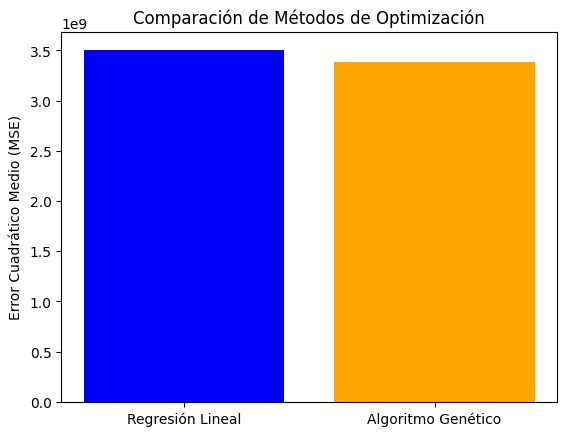

In [166]:
# --- COMPARACIÓN VISUAL ---
labels = ['Regresión Lineal', 'Algoritmo Genético']
mse_values = [mse_lr_non_linear_case1, mse_ga_non_linear_case1]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Métodos de Optimización")
plt.show()


Caso 1: Elevando Size**2 y Room**3

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad

# Precio de la casa (fórmula ficticia con ruido)
true_weights = np.array([3000, 10000, -5000, -1000])  # Pesos reales de cada feature
price = (true_weights[0] * size**2 + true_weights[1] * rooms**3 +
         true_weights[2] * distance + true_weights[3] * age +
         np.random.normal(0, 50000, num_samples))  # Se agrega ruido aleatorio

# Convertir en matriz de características X e y
X = np.column_stack((size, rooms, distance, age))
y = price

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [168]:
X_train_non_linear = X_train.copy()
X_test_non_linear = X_test.copy()

X_train_non_linear[:,0] = X_train_non_linear[:, 0] ** 2
X_train_non_linear[:,0] = X_train_non_linear[:, 1] ** 3

X_test_non_linear[:,0] = X_test_non_linear[:, 0] ** 2
X_test_non_linear[:,0] = X_test_non_linear[:, 1] ** 3

In [169]:
# --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
model = LinearRegression()
#model.fit(X_train, y_train)
model.fit(X_train_non_linear, y_train)
y_pred_lr = model.predict(X_test_non_linear)
mse_lr_non_linear_case2 = mean_squared_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"Coeficientes: {model.coef_}")
print(f"Error Cuadrático Medio (MSE): {mse_lr_non_linear_case2:.2f}")


--- Regresión Lineal ---
Coeficientes: [ -868322.4755667  28693355.62983485   247044.40128433   270595.55534539]
Error Cuadrático Medio (MSE): 4945346678379250.00


In [170]:
# --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---
from scipy.optimize import differential_evolution

# Definir la función de costo (MSE entre predicciones y valores reales)
def cost_function(weights):
    #y_pred = np.dot(X_train, weights)
    y_pred = np.dot(X_train_non_linear, weights)
    return mean_squared_error(y_train, y_pred)

# Definir los límites de los coeficientes
bounds = [(-900000, 900000)] * 4  # Rango de búsqueda para cada coeficiente

# Aplicar Algoritmo Genético
result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)  # MODIFICAR EL CODIGO AQUI

# Evaluar el modelo genético
best_weights = result.x
y_pred_ga = np.dot(X_test_non_linear, best_weights)
mse_ga_non_linear_case2 = mean_squared_error(y_test, y_pred_ga)

print("\n--- Algoritmo Genético ---")
print(f"Mejores coeficientes encontrados: {best_weights}")
print(f"Error Cuadrático Medio (MSE): {mse_ga_non_linear_case2:.2f}")


--- Algoritmo Genético ---
Mejores coeficientes encontrados: [746326.86261454 900000.         900000.         900000.        ]
Error Cuadrático Medio (MSE): 4277647561798993.50


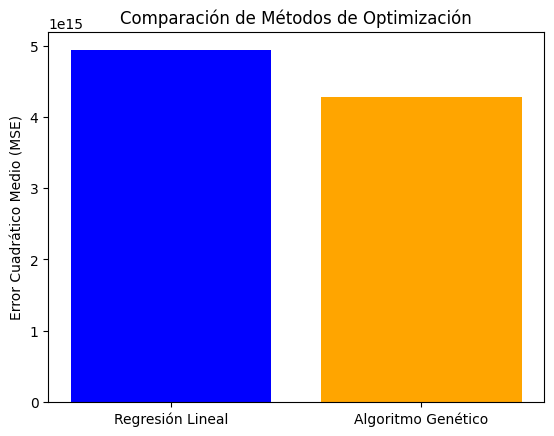

In [171]:
# --- COMPARACIÓN VISUAL ---
labels = ['Regresión Lineal', 'Algoritmo Genético']
mse_values = [mse_lr_non_linear_case2, mse_ga_non_linear_case2]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Métodos de Optimización")
plt.show()

In [190]:
# Plotting the MSE for Linear Regression and Genetic Algorithm
mse_lr_list = [mse_lr, mse_lr_non_linear_case1, mse_lr_non_linear_case2]
mse_ga_list = [mse_ga, mse_lr_non_linear_case1, mse_lr_non_linear_case2]

labels = ['mse_lr linear', 'mse_lr (size**2)', 'mse_lr (size**2 room**3)', 'mse_ga linear', 'mse_ga (size**2)', 'mse_ga (size**2 room**3)']
mse_values = mse_lr_list + mse_ga_list

In [191]:
print(mse_values)

[5055984968.794173, 3507122262.4353766, 4945346678379250.0, 5002028975.899902, 3507122262.4353766, 4945346678379250.0]


/var/folders/1v/dv0041y542315rygkq9t62zr0000gn/T/ipykernel_13898/3976099029.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


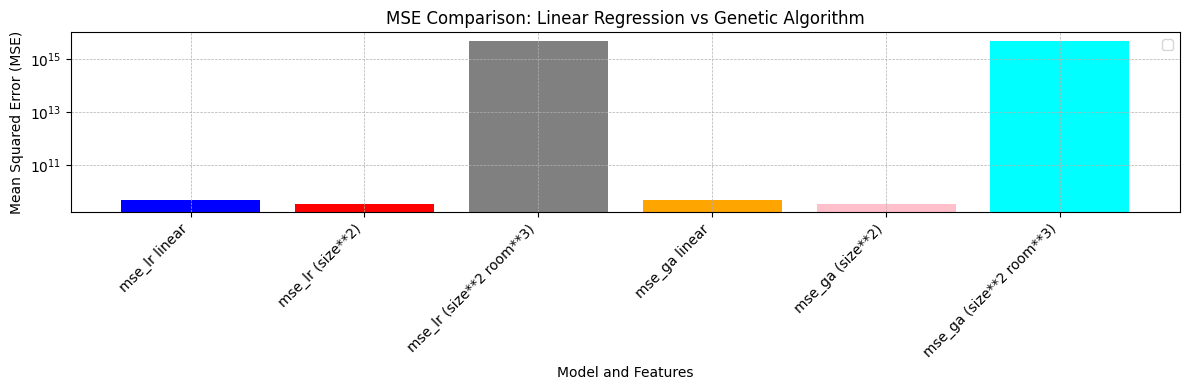

In [208]:
# Create the plot
plt.figure(figsize=(12, 4))
plt.bar(labels, mse_values, color=['blue', 'red', 'gray', 'orange', 'pink', 'cyan'])
plt.xlabel('Model and Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison: Linear Regression vs Genetic Algorithm')

plt.xticks(rotation=45, ha='right')
plt.yscale('log')

plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

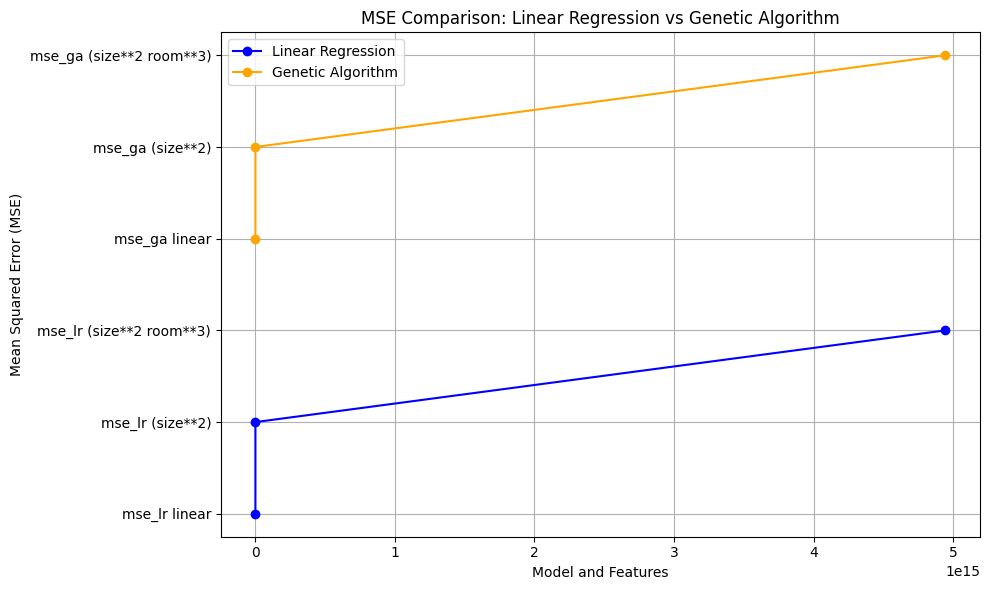

In [211]:
mse_lr_values = mse_values[:3]  # First three values are for Linear Regression
mse_ga_values = mse_values[3:]  # Last three values are for Genetic Algorithm

# Create labels for the models
lr_labels = labels[:3]
ga_labels = labels[3:]

plt.figure(figsize=(10, 6))

# Plot Linear Regression
plt.plot(mse_lr_values, lr_labels, marker='o', linestyle='-', color='b', label='Linear Regression')

# Plot Genetic Algorithm
plt.plot(mse_ga_values, ga_labels, marker='o', linestyle='-', color='orange', label='Genetic Algorithm')

# Add labels and title
plt.xlabel('Model and Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison: Linear Regression vs Genetic Algorithm')

# Show the grid and the chart
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

COLOCAR LA CONCLUSION AQUI:
* Mientras se va rompiendo la linealidad en los datos la Regresión Lineal va empeorando su rendimiento. Su mejor resultado - considerando el MSE - fue cuando los datos eran lineales pero al introducir un feature al cuadrado, se incrementó el error, y su error se disparó exponencialmente al introducir un segundo feature al cubo. Lo cual indica que cuando la relación entre los datos deja de ser lineal y se va complejizando, la predicción de sus resultados van empeorando.

* Los algoritmos genéticos se pueden adaptar a varios tipos de problemas; sin embargo, su performace también fue empeorando mientras se iba eliminando la linealidad de los datos. Cabe recalcar que para los casos no lineales (caso 2: size**2 y caso 3: (size**2 y room**3) el algoritmo genético tuvo un MSE ligeramente menor.

* Para mejorar los resultados del algoritmo genético ya que se supone que es un algoritmo más flexible para manejar relaciones no lineales, se deben modificar sus hiperparámetros como son la taza de mutación, el tamaño de la población, número de generaciones, taza de crossover para mejorar su convergencia y así mejorar sus resultados.


4. Agregar más features

**Número de baños:** entre 1 - 3, con su correspondiente valor real de theta=500

**Tiene garaje** (0 = No, 1 = Sí), con su correspondiente valor real de theta=15000


--- Regresión Lineal ---
Coeficientes: [  2854.80549227   9947.30228338  -3829.72696166   -435.90455937
  14438.57331257  -3466.59470447 -13017.71152851   8418.56606997]
Error Cuadrático Medio (MSE): 1657454290.32

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [  2837.18530155   9065.51701517  -4161.80004918   -571.6165148
  14501.98221322  -4996.5993613  -15617.68228402   7215.62595176]
Error Cuadrático Medio (MSE): 1725357320.39


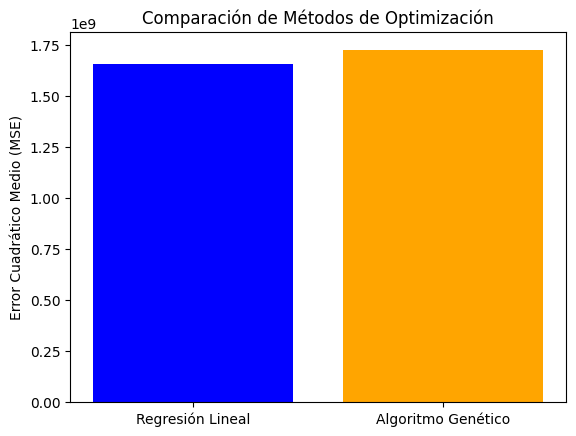

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generar datos ficticios para la predicción del precio de una casa
np.random.seed(42)
num_samples = 100

# Features (Tamaño, Número de habitaciones, Distancia al centro, Antigüedad)
size = np.random.randint(50, 300, num_samples)  # Tamaño en m²
rooms = np.random.randint(1, 6, num_samples)  # Número de habitaciones
distance = np.random.uniform(1, 20, num_samples)  # Distancia en km
age = np.random.randint(0, 50, num_samples)  # Años de antigüedad
#INSERTAR AQUI LAS DOS NUEVAS FEATURES
banos = np.random.randint(0, 4, num_samples)  # Número de baños
garaje = np.random.randint(0, 2, num_samples)  # Número de garages

jardin = np.random.randint(0, 2, num_samples) # Número de áreas verdes
bodegas = np.random.randint(0, 3, num_samples) # Número de bodegas


# Precio de la casa (fórmula ficticia con ruido)
true_weights = np.array([3000, 10000, -5000, -1000, 5000, 3000, 4000, -1500])  # Pesos reales de cada feature: INSERTAR AQUI LOS DOS NUEVOS THETAS REALES DE LAS DOS NUEVAS FEATURES
price = (true_weights[0] * size + true_weights[1] * rooms +
         true_weights[2] * distance + true_weights[3] * age + true_weights[4] * banos + true_weights[5] * garaje +
         true_weights[6] * jardin + true_weights[7] * bodegas +
         np.random.normal(0, 50000, num_samples))  # Se agrega ruido aleatorio  # AGREGAR AQUI LAS CONTRIBUCIONES DE LAS DOS NUEVAS FEASTURES

# Convertir en matriz de características X e y
X = np.column_stack((size, rooms, distance, age, banos, garaje, jardin, bodegas))
y = price

# Dividir datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- MÉTODO 1: REGRESIÓN LINEAL CON SKLEARN ---
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("\n--- Regresión Lineal ---")
print(f"Coeficientes: {model.coef_}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")

# --- MÉTODO 2: OPTIMIZACIÓN CON ALGORITMO GENÉTICO ---
from scipy.optimize import differential_evolution

# Definir la función de costo (MSE entre predicciones y valores reales)
def cost_function(weights):
    y_pred = np.dot(X_train, weights)
    return mean_squared_error(y_train, y_pred)

# Definir los límites de los coeficientes
bounds = [(-50000, 50000)] * 8  # Rango de búsqueda para cada coeficiente

# Aplicar Algoritmo Genético
result = differential_evolution(cost_function, bounds, strategy='best1bin',
                                mutation=(0.5, 1), recombination=0.7, popsize=20, maxiter=100)  # MODIFICAR EL CODIGO AQUI

# Evaluar el modelo genético
best_weights = result.x
y_pred_ga = np.dot(X_test, best_weights)
mse_ga = mean_squared_error(y_test, y_pred_ga)

print("\n--- Algoritmo Genético ---")
print(f"Mejores coeficientes encontrados: {best_weights}")
print(f"Error Cuadrático Medio (MSE): {mse_ga:.2f}")

# --- COMPARACIÓN VISUAL ---
labels = ['Regresión Lineal', 'Algoritmo Genético']
mse_values = [mse_lr, mse_ga]

plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel("Error Cuadrático Medio (MSE)")
plt.title("Comparación de Métodos de Optimización")
plt.show()


COLOCAR AQUI SUS CONCLUSIONES:

* Al duplicar prácticamente el número de features en el modelo pasando de 4 en la actividad 1 a 8 en la actividad 4, el modelo tiene una mayor flexibilidad para ajustar sus coeficientes ya que tiene más información, lo que termina en la mejora del ajuste y reducción del error. El modelo de Regresión Lineal ajustará los coeficientes para minimizar el error, y al tener más variables, el modelo tiene más grados de libertad para encontrar una solución que se ajuste mejor a los datos.
* En el caso del Algoritmo Genético, al tener más características, se vuelve más fácil para el algoritmo explorar combinaciones de pesos y encontrar mejores soluciones que reduzcan el error.
* Si bien los MSE se redujeron comparando con la actividad 1, la regresión lineal tiene un menor MSE que el algoritmo genético ya que los datos tienen una relación lineal.

5. Comparar los coeficientes obtenidos por cada approach

Caso Actividad 1: Caso Base

--- Regresión Lineal ---
Coeficientes: [ 3012.96110744 12229.23540223 -4942.56909887 -1255.07766091]

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 3014.5447834  12304.66803161 -4912.27683466 -1242.45597813]

Caso Actividad 2: Modificar los pesos

Iteración 1
--- Regresión Lineal ---
Coeficientes: [ 3012.96110744 12229.23540223 -4942.56909887 -1255.07766091]

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 3014.58354828 12297.57614814 -4911.34483473 -1242.36073856]


Iteración 2
--- Regresión Lineal ---
Coeficientes: [-4033.97832354 20730.6880798  87560.84504957 -2951.3402873 ]

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [-4017.70674626 21532.56756898 87879.17516279 -2820.45672056]


Iteración 3
--- Regresión Lineal ---
Coeficientes: [ 26884.90437956  76373.68978197 -54178.01244116 -11221.40855308]

--- Algoritmo Genético ---
Mejores coeficientes encontrados: 26891.2458


Actividad 3: Romper la linealidad

Caso 1 
--- Regresión Lineal ---
Coeficientes: [ 2999.76775366  9260.09621968 -4613.26878558 -1000.28533237]

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [ 2999.81896824  9607.75473748 -3856.04314803 -1000.16482124]

Caso 2
--- Regresión Lineal ---
Coeficientes: [ -868322.4755667  28693355.62983485   247044.40128433   270595.55534539]

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [746326.86261454 900000.         900000.         900000.        ]

Actividad 4: Aumentar 4 features

--- Regresión Lineal ---
Coeficientes: [  2854.80549227   9947.30228338  -3829.72696166   -435.90455937
  14438.57331257  -3466.59470447 -13017.71152851   8418.56606997]

--- Algoritmo Genético ---
Mejores coeficientes encontrados: [  2837.18530155   9065.51701517  -4161.80004918   -571.6165148
  14501.98221322  -4996.5993613  -15617.68228402   7215.62595176]


Conclusión:
  Los coeficientes obtenidos por el algoritmo genético son muy similares a los de la regresión lineal, los resultados más distintos fueron en el caso de size**2 y room **3, lo que indica que el algoritmo genético aunque su approach es muy distinto al de una regresión lineal puede llegar a predecir resultados de un dataset cuya relación es lineal.




**Aquí comente sobras las actividad 2 a la 4.** Los coeficientes de ajuste han sido los mismos?

**Su Comentario:**

Los comentarios están descritos en cada actividad